In [ ]:
import numpy as np
import scipy.stats
from matplotlib import pyplot

# Multiplie Secretary Problems with Unknown Item Value Distribution


**Apparoach**: Q learning table, discounted learning, epsilon greedy stratregy with adaptive epsilon value.



In [ ]:
class LearningAgent:
  def __init__(self, num_items, num_choices):
    # implement your code here
    self.num_items = num_items
    self.num_choices = num_choices
    self.table=np.zeros((num_items,2))
    self.epsilon=1.0 #exploration constant
    self.alpha=0.1 #learning rate
    self.gamma=0.96 #discount learning
    pass

  def prepare(self, episode_id):
    # implement your code here
    self.epsilon=max(0.1,1.0-episode_id/50000) #not using more than 0.1% exploration for better outcomes.
    self.current_state=0
    self.actions=[]
    self.rewards=[]

    pass

  def action(self, episode_id, t, value):
    # modify the code below
    if np.random.rand()<self.epsilon:
      action=np.random.randint(2)
    else:
      action=np.argmax(self.table[t])
    if action==1:
      return "select"
    return "skip"

  def update(self, episode_id, actions, rewards):
    # implement your code here
    self.actions=actions
    self.rewards=rewards
    for t in range(len(actions)):
      if actions[t]=="select":
        extra_reward=0
        if t!=(len(actions)-1):
          next_best_action=np.argmax(self.table[t+1])
          extra_reward=self.gamma*self.table[t+1][next_best_action]

        self.table[t][1]+=self.alpha*(rewards[t]+extra_reward-self.table[t][1])
      else:
        extra_reward=0
        if t!=(len(actions)-1):
          next_best_action=np.argmax(self.table[t+1])
          extra_reward=self.gamma*self.table[t+1][next_best_action]

        self.table[t][0]+=self.alpha*(rewards[t]+extra_reward-self.table[t][0])

    pass

The following code `simulate_multi` function provides a simulated environment that your learning agent will interact with. Any item value distribution can be integrated through the first argument `value_generator`, the function being called to generate the random item values.

In [ ]:
def simulate_multi(value_generator, agent, num_items, num_choices, num_episodes):
  results = []

  for episode_id in range(num_episodes):
    agent.prepare( episode_id )         # let the agent prepare for a new episode
    np.random.seed( seed=episode_id )
    item_values = value_generator()     # generate the item values

    remaining_num_choices = num_choices
    actions = []
    rewards = []

    for t,v in enumerate( item_values ):
      action = agent.action( episode_id, t, v ) # retrieve the agent's decision
      assert( action in ("select", "skip") )    # the agent's action must be either "select" or "skip"
      actions.append( action )

      if action == "select":
        rewards.append( v )
        remaining_num_choices -= 1
      else:
        rewards.append( 0 )

      if remaining_num_choices == 0:
        break

    agent.update( episode_id, actions, rewards )    # let the agent update
    results.append( sum(rewards) )

  return results

 Evaluated with the following code: agent is asked to learn the optimal strategy through 50000 episodes where the ground truth item value distribution is given by **exponential distribution**

average performance in the last 1000 episodes = 1.935098


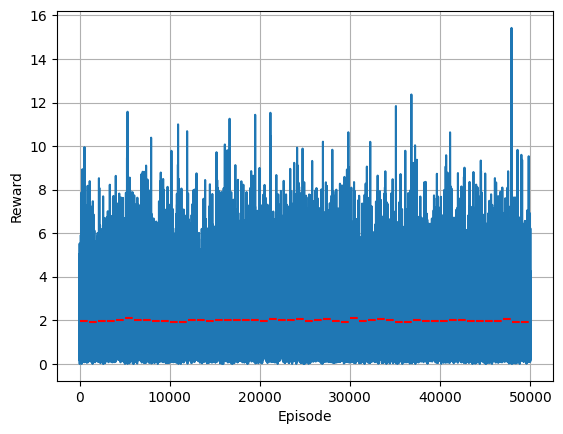

In [ ]:
num_items = 10
num_choices = 2
num_episodes = 50000

agent = LearningAgent(num_items, num_choices)
results = simulate_multi( lambda: scipy.stats.expon.rvs( size=num_items ), agent, num_items, num_choices, num_episodes )
print( "average performance in the last 1000 episodes = %f" % np.mean(results[-1000:]) )

pyplot.plot( np.arange(num_episodes), results )
interval = 1000
for t in range(0, num_episodes, interval ):
  pyplot.plot( np.arange(t, t+interval), np.ones(interval) * np.mean(results[t:t+interval]), c='r', ls='--' )
pyplot.xlabel( "Episode" )
pyplot.ylabel( "Reward" )
pyplot.grid( True )

Agent will be evaluated also for the environment where the ground truth item value distribution is given by **uniform distribution**.

average performance in the last 1000 episodes = 1.476889


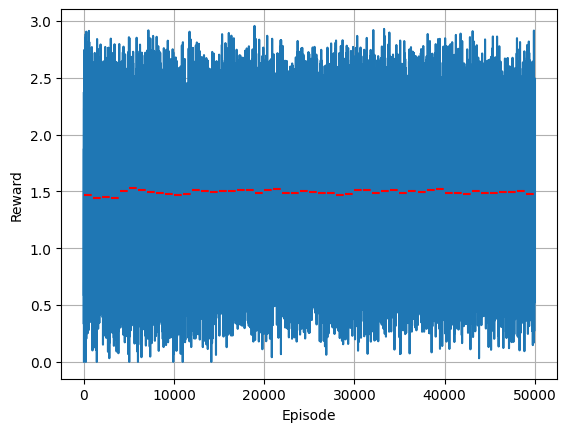

In [ ]:
num_items = 10
num_choices = 3
num_episodes = 50000

agent = LearningAgent(num_items, num_choices)
results = simulate_multi( lambda: np.random.random( size=num_items ), agent, num_items, num_choices, num_episodes )
print( "average performance in the last 1000 episodes = %f" % np.mean(results[-1000:]) )

pyplot.plot( np.arange(num_episodes), results )
interval = 1000
for t in range(0, num_episodes, interval ):
  pyplot.plot( np.arange(t, t+interval), np.ones(interval) * np.mean(results[t:t+interval]), c='r', ls='--' )
pyplot.xlabel( "Episode" )
pyplot.ylabel( "Reward" )
pyplot.grid( True )